<a href="https://colab.research.google.com/github/Bhuvan588/Eye-Disease-Detection/blob/main/Eye_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset

In [1]:
!kaggle datasets download -d kondwani/eye-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/kondwani/eye-disease-dataset
License(s): CC-BY-NC-SA-4.0
100% 4.96M/4.96M [00:00<00:00, 48.5MB/s]
100% 4.96M/4.96M [00:00<00:00, 48.1MB/s]


In [2]:
from zipfile import ZipFile

with ZipFile('eye-disease-dataset.zip', 'r') as zip:
  zip.extractall()
  print("Eye dataset extracted successfully!!")

Eye dataset extracted successfully!!


Importing Dependencies

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [4]:
#Checking no of images in each directory
print("No of Bulging Eyes images: ", len(os.listdir("/content/Eye_diseases/Bulging_Eyes")))
print("No of Catarcat images: ", len(os.listdir("/content/Eye_diseases/Cataracts")))
print("No of Crossed Eye images: ", len(os.listdir("/content/Eye_diseases/Crossed_Eyes")))
print("No of Glaucoma Images: ", len(os.listdir("/content/Eye_diseases/Glaucoma")))
print("No of Uveitis Images: ", len(os.listdir("/content/Eye_diseases/Uveitis")))

No of Bulging Eyes images:  30
No of Catarcat images:  47
No of Crossed Eye images:  174
No of Glaucoma Images:  82
No of Uveitis Images:  50


Displaying some sample images

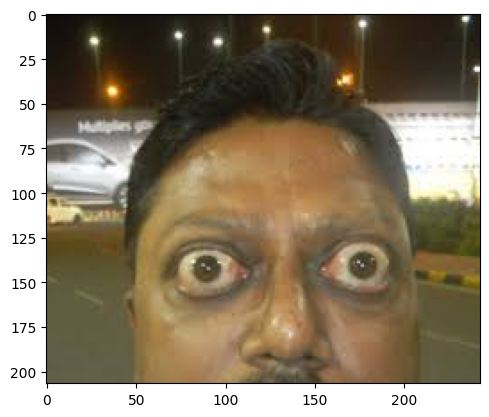

In [7]:
img = mpimg.imread("/content/Eye_diseases/Bulging_Eyes/image-10.jpeg")
imgplot = plt.imshow(img)
plt.show()

Creating labels for the classes of images

In [8]:
bulging_eye_labels= [0] *30
cataract_labels= [1] * 47
crossed_eye_labels= [2] * 174
glaucoma_labels= [3] * 82
uveitis_labels= [4] *50


labels = bulging_eye_labels + cataract_labels + crossed_eye_labels + glaucoma_labels + uveitis_labels

In [9]:
labels = np.array(labels)

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [12]:
len(labels)

383

Converting Images to Numpy Arrays


In [11]:
data=[]
from PIL import Image

bulging_eye_path = "/content/Eye_diseases/Bulging_Eyes"
for img_file in os.listdir(bulging_eye_path):
  img = Image.open(os.path.join(bulging_eye_path, img_file))
  img =  img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

cataracts_path = "/content/Eye_diseases/Cataracts"
for img_file in os.listdir(cataracts_path):
  img = Image.open(os.path.join(cataracts_path, img_file))
  img =  img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

crossed_eye_path = "/content/Eye_diseases/Crossed_Eyes"
for img_file in os.listdir(crossed_eye_path):
  img = Image.open(os.path.join(crossed_eye_path, img_file))
  img =  img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

glaucoma_path = "/content/Eye_diseases/Glaucoma"
for img_file in os.listdir(glaucoma_path):
  img = Image.open(os.path.join(glaucoma_path, img_file))
  img =  img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

uveitis_path = "/content/Eye_diseases/Uveitis"
for img_file in os.listdir(uveitis_path):
  img = Image.open(os.path.join(uveitis_path, img_file))
  img =  img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

In [13]:
len(data)

383

Splitting data and performing train test split

In [14]:
X = np.array(data)
y = np.array(labels)

Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2, stratify = y)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(383, 128, 128, 3) (306, 128, 128, 3) (77, 128, 128, 3)


Scaling the input image pixels

In [17]:
X_train= X_train/ 255
X_test = X_test / 255

Building the CNN . Here we are using AlexNet

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

In [34]:
number_of_classes = 5

#ALEXNET ARCHITECTURE CONSISTS OF 5 CONVOLUTIONAL LAYERS FOLLOWED BY 2 DENSE LAYERS

model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape =(128,128,3), kernel_size = (11,11),strides=(4,4), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="same"))

#2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (5,5), strides=(1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="same"))

#3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size =(3,3), strides =(1,1), padding ="same", activation="relu"))
model.add(BatchNormalization())

#4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size =(3,3), strides =(1,1), padding ="same", activation="relu"))
model.add(BatchNormalization())

#5th Convolutiona Layer
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides= (1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="same"))


#Flattening because Dense layer expects 1D inputs
model.add(Flatten())

#Dense Layers i.e. Fuully Connected Layers
model.add(Dense(4096, activation="relu",kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(4096, activation="relu",kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))


#Output Layer
model.add(Dense(number_of_classes, activation="softmax"))

Model Summary

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_13 (Ba  (None, 16, 16, 256)       1024      
 tchNormalization)                                               
                                                      

In [36]:
#Compiling the model
model.compile(metrics = ["accuracy"], optimizer=Adam(learning_rate=0.001), loss ="sparse_categorical_crossentropy")

In [37]:
#Training the model
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), batch_size = 32)

Epoch 1/50
10/10 [==============================] - 31s 3s/step - loss: 5.3572 - accuracy: 0.2451 - val_loss: 66.6899 - val_accuracy: 0.1169
Epoch 2/50
10/10 [==============================] - 23s 2s/step - loss: 4.7771 - accuracy: 0.3170 - val_loss: 225.9119 - val_accuracy: 0.0779
Epoch 3/50
10/10 [==============================] - 25s 2s/step - loss: 3.7376 - accuracy: 0.3497 - val_loss: 205.9068 - val_accuracy: 0.4545
Epoch 4/50
10/10 [==============================] - 25s 3s/step - loss: 3.6374 - accuracy: 0.3987 - val_loss: 109.0789 - val_accuracy: 0.4545
Epoch 5/50
10/10 [==============================] - 25s 2s/step - loss: 3.1486 - accuracy: 0.4346 - val_loss: 108.8605 - val_accuracy: 0.4545
Epoch 6/50
10/10 [==============================] - 23s 2s/step - loss: 2.9828 - accuracy: 0.4314 - val_loss: 34.1714 - val_accuracy: 0.4545
Epoch 7/50
10/10 [==============================] - 25s 2s/step - loss: 2.8822 - accuracy: 0.4641 - val_loss: 19.5104 - val_accuracy: 0.4545
Epoch 8/5